# Obliczenia Naukowe
### Labolatoria, Lista 2<br/>Kamil Matejuk, 250135

## Zad 1

*Powtórz zadanie 5 z listy 1, ale usuń ostatnią 9 z $x_4$ i ostatnią 7 z $x_5$. Jaki wpływ na
wyniki mają niewielkie zmiany danych?.<br/>
(zad 5 z listy 1) Napisz program w języku Julia realizujący następujący eksperyment obliczania iloczynu skalarnego dwóch wektorów:<br/>
x = [2.718281828, −3.141592654, 1.414213562, 0.5772156649, 0.3010299957]<br/>
y = [1486.2497, 878366.9879, −22.37492, 4773714.647, 0.000185049]<br/>
Zaimplementuj cztery algorytmy i policz sumę na cztery sposoby dla n = 5 (“w przód”, “w tył”, od największego do najmniejszego, od najmniejszego do największego). Użyj pojedynczej i podwójnej precyzji (typy Float32 i Float64 w języku Julia). Porównaj wyniki z prawidłową wartością (dokładność do 15 cyfr) $−1.00657107000000 \cdot 10^{−11}$*

In [1]:
# Kamil Matejuk, 250135
using Printf

function scalar_product_1(dtype, arr1, arr2)
    @assert length(arr1) == length(arr2)
    sum = convert(dtype, 0)
    for i in 1:length(arr1)
        i1 = convert(dtype, arr1[i])
        i2 = convert(dtype, arr2[i])
        sum = sum + i1*i2
    end
    return sum
end

function scalar_product_2(dtype, arr1, arr2)
    @assert length(arr1) == length(arr2)
    sum = convert(dtype, 0)
    for i in 1:length(arr1)
        j = length(arr1) - i + 1
        i1 = convert(dtype, arr1[j])
        i2 = convert(dtype, arr2[j])
        sum = sum + i1*i2
    end
    return sum
end

function scalar_product_3(dtype, arr1, arr2)
    @assert length(arr1) == length(arr2)
    arr = []
    for i in 1:length(arr1)
        i1 = convert(dtype, arr1[i])
        i2 = convert(dtype, arr2[i])
        push!(arr, i1*i2)
    end
    arr = sort(arr) # smallest to highest
    sum = convert(dtype, 0)
    for i in 1:length(arr)
        j = length(arr) - i + 1
        sum = sum + arr[j]
    end
    return sum
end

function scalar_product_4(dtype, arr1, arr2)
    @assert length(arr1) == length(arr2)
    arr = []
    for i in 1:length(arr1)
        i1 = convert(dtype, arr1[i])
        i2 = convert(dtype, arr2[i])
        push!(arr, i1*i2)
    end
    arr = sort(arr) # smallest to highest
    sum = convert(dtype, 0)
    for i in arr
        sum = sum + i
    end
    return sum
end

function compare_scalars()
    x1 = [2.718281828, -3.141592654, 1.414213562, 0.5772156649, 0.3010299957]
    x2 = [2.718281828, -3.141592654, 1.414213562, 0.577215664, 0.301029995]
    y = [1486.2497, 878366.9879, -22.37492, 4773714.647, 0.000185049]
    correct = -1.00657107000000e-11
    println("Correct Result: $correct")
    println("Data Type        Function           Prevoius Result          Result After Change             Cond(x)")
    for dtype in [Float32, Float64]
        for f in [scalar_product_1, scalar_product_2, scalar_product_3, scalar_product_4]
            s1 = f(dtype, x1, y)
            s2 = f(dtype, x2, y)
            cond = (abs(s1 - s2)/abs(s1)) / 0.0000000009
            println(" $dtype     $f $(@sprintf("%25s", s1)) $(@sprintf("%25s", s2)) $(@sprintf("%25s", cond))")
        end
    end
end
compare_scalars()

Correct Result: -1.00657107e-11
Data Type        Function           Prevoius Result          Result After Change             Cond(x)
 Float32     scalar_product_1                -0.4999443                -0.4999443                       0.0
 Float32     scalar_product_2                -0.4543457                -0.4543457                       0.0
 Float32     scalar_product_3                      -0.5                      -0.5                       0.0
 Float32     scalar_product_4                      -0.5                      -0.5                       0.0
 Float64     scalar_product_1    1.0251881368296672e-10     -0.004296342739891585     4.6564275354446776e16
 Float64     scalar_product_2   -1.5643308870494366e-10     -0.004296342998713953     3.0516013643410852e16
 Float64     scalar_product_3                       0.0     -0.004296342842280865                       Inf
 Float64     scalar_product_4                       0.0     -0.004296342842280865                       Inf


Jak widać dla typu `Float32` wszystkie funkcje zwróciły taką samą wartość dla zmienionych danych. Oznacza to ze zmiana w wartościach była na tyle mała, że po dodaniu jej do dużej już sumy różnica została stracona, poprzez radukcje bitów znaczących, zatem typ `Float32` ma za małą dokładność.<br/>
Natomaist dla typu `Float64`, każda funkcja zwróciła prawie taki sam wynik (funkcja 3 i 4 taki sam). Widać, że dla funkcji 3 i 4, zmiana wartości pozwoliła na takie zaokrąglenie wartości, że finalna redukcja bitów znaczących nie zaokrągliła się do zera. Niemniej jednak, wynik stracił bardzo na dokładności. Jak widać wskaźnik uwarunkowania zadania jest bardzo duży, co oznacza złe uwarunkowanie zadania.

## Zad 2

*Narysować wykres funkcji $f(x) = e^x ln(1 + e^{−x})$ w co najmniej dwóch dowolnych programach do wizualizacji. Następnie policzyć granicę funkcji $\lim_{x\rightarrow \infty} f(x)$. Porównać wykres funkcji z policzoną granicą. Wyjaśnić zjawisko.*

Do obliczenia granicy wykorzystam regułę $de l'Hospitala$:
$$ \lim_{x \rightarrow \infty} e^x ln(1 + e^{−x}) = 
\lim_{x \rightarrow \infty} \frac{ln(1 + e^{−x})}{e^{-x}} =^H 
\lim_{x \rightarrow \infty} \frac{\frac{d}{dx}(ln(1 + e^{−x}))}{\frac{d}{dx}(e^{-x})} = 
\lim_{x \rightarrow \infty} \frac{-\frac{1}{e^x+1}}{-e^{-x}} = 
\lim_{x \rightarrow \infty} \frac{1}{1 + e^{-x}} = 1 $$

Granica funkcji powinna wynosić 1, natomiast na poniższych wykresach widać, jak operacje wykonywane na komputerze potrafią się róznić od matematycznej prawdy.

Poniższy kod rysuje funkcję `f(x)` wykorzystując wbudowaną bibliotekę `Plots` w języku Julia.<br/>
Jak widać na wykresie początkowo wartość zbiega do 1, natomiast zaczyna szaleć w okolicach $x=32$. Dla $x\ge 35$ zwraca zero. Dzieje się tak ponieważ $e^{-x}$ zaczyna być bardzo małe i po dodaniu do $1$ zostaje całkowicie zredukowane. Wtedy też $ln(1 + e^{−x}) \simeq ln(1) = 0$, przez co wartość zwracana przez funckję `f` wynosi zero.

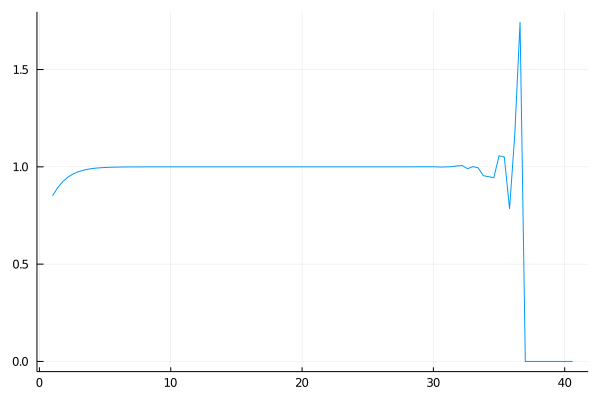

In [2]:
# Kamil Matejuk, 250135
using Plots

function f(x)
    return exp(x) * log(1+exp(-x))
end

function draw(a, b)
    x = [a + i*(b-a+1)/100 for i in 0:99]
    y = [f(xi) for xi in x]
    plot(x, y, legend=false)
end

draw(1, 40)

Poniżej znajduje się wykres wygenerowany przez serwis https://www.desmos.com/calculator. Wartość początkowo utrzymuje się na 1, natomaist podobnie jak w Julii, na zakresie $[32, 36]$ zaczyna wariować i traci ciagłość. Dla wartości $x \ge 37$ zwraca zero, z podobnych powodów jak powyżej. 

![title](desmos-graph)

## Zad 3

*Rozważmy zadanie rozwiązywania układu równań liniowych $Ax = b$ dla danej macierzy współczynników $A\in R^{n\times n}$ i wektora prawych stron $b\in R^n$.<br/>
Macierz A generować w następujący sposób:*
* *$A = H_n$, gdzie $H_n$ jest macierzą Hilberta stopnia $n$*
* *$A = R_n$, gdzie $R_n$ jest losową macierzą stopnia n z zadanym wskaźnikiem uwarunkowania c*

*Wektor $b$ zadany jest następująco $b = A\times x$, gdzie $x = (1, . . . , 1)^T$.<br/>
Rozwiązać Ax = b za pomocą dwóch algorytmów:*
* *eliminacji Gaussa (x=A\b)*
* *x = A^{−1}b (x=inv(A)*b)*

*Eksperymenty wykonać dla macierzy Hilberta $H_n$ z rosnącym stopniem $n>1$ oraz dla macierzy losowej $R_n$, $n=5, 10,20$ z rosnącym wskaźnikiem uwarunkowania $c=1,10,10^3,10^7,10^{12},10^{16}$. Porównać obliczony $\tilde{x}$ z rozwiązaniem dokładnym $x=(1, . . . , 1)^T$ tj. policzyć błędy względne.*

In [3]:
# Kamil Matejuk, 250135
using LinearAlgebra

# generate Hilbert matrix
function H(n)
    if n < 1
         error("size n should be >= 1")
    end
    return [ 1 / (i + j - 1) for i in 1:n, j in 1:n ]
end
# generate random matrix
function R(n, c)
    if n < 2 || c < 1.0
         error("size n should be > 1 and condition number c should be >= 1.0")
    end
    (U,S,V)=svd(rand(n,n))
    return U*diagm(0 =>[LinRange(1.0,c,n);])*V'
end
# generate vector b
function gen_b(A)
    n = sqrt(length(A))
    x = [1.0 for i in 1:n]
    result = similar(x)
    mul!(result, A, x)
    return result
end
# solve using Gauss elimination
function solve_Gauss(A, b)
#     return sum(A ./ b, dims=2)
    return A \ b
end
# solve using unversion
function solve_inv(A, b)
    return inv(A) * b
end
# calculate reative error
function err(v, n)
    error = 0
    # 1-norm
    if n == 1
        for i in v
            error += abs(i - 1)
        end
        error = error / length(v)
    # 2-norm
    elseif n == 2
        for i in v
            error += (i - 1)^2
        end
        error = sqrt(error) / sqrt(length(v))
    # max-norm
    elseif n == 3
        max = 0
        for i in v
            max = abs(i - 1) > max ? abs(i - 1) : max
        end
        error = max / 1
    end
    return error
end

err (generic function with 1 method)

In [4]:
# Kamil Matejuk, 250135
using Printf

# experiments for Hilbert matrix
println("             Cond(H(n))              Err Gauss                 Err Inversion")
for n in 1:1:40
    A = H(n)
    b = gen_b(A)
    cnd = cond(A)
    s_g_e = err(solve_Gauss(A, b), 1)
    s_i_e = err(solve_inv(A, b), 1)
    println("H($n) $(@sprintf("%-25s", cnd)) $(@sprintf("%-25s", s_g_e)) $(@sprintf("%-25s", s_i_e))")
end

             Cond(H(n))              Err Gauss                 Err Inversion
H(1) 1.0                       0.0                       0.0                      
H(2) 19.28147006790397         5.551115123125783e-16     1.3322676295501878e-15   
H(3) 524.0567775860644         6.994405055138486e-15     0.0                      
H(4) 15513.738738928929        3.860800568133982e-13     5.755396159656812e-13    
H(5) 476607.25024224253        1.5574208589441695e-13    5.127276381244883e-12    
H(6) 1.495105864125091e7       2.6604794293542494e-10    2.4510882212780416e-10   
H(7) 4.7536735637688667e8      9.68482321323754e-9       3.82611428254417e-9      
H(8) 1.5257575516147259e10     1.7725865927853413e-7     2.8848535293946043e-7    
H(9) 4.9315408927806335e11     6.690223052687985e-6      8.046898680428663e-6     
H(10) 1.6024859712306152e13     0.0001491619253336296     0.00022150515578687192   
H(11) 5.2210348947688544e14     0.003987004418018187      0.00694977758790959      
H(12) 1.

Dla macierzy Hilberta, obie metody zwracają wyniki o podbnych błędach. Błąd nie zależy liniowo od rozmiaru $n$.<br/>
Natomiast ważne jest, że macierz Hilberta jest bardzo źle uwarunkowana - `cond(H(n))` jest bardzo duże i szybko rośnie wraz z $n$.

In [5]:
# Kamil Matejuk, 250135
using Printf

# experiments for random matrix
println("                        Gauss                   Inversion")
for n in [5, 10, 20]
    for c in [1, 10, 1e3, 1e7, 1e12, 10e16]
        A = R(n, c)
        b = gen_b(A)
        s_g_e = err(solve_Gauss(A, b), 1)
        s_i_e = err(solve_inv(A, b), 1)
        title = "R($n,$c)"
        println("$(@sprintf("%-15s", title)) $(@sprintf("%-25s", s_g_e)) $(@sprintf("%-25s", s_i_e))")
    end
end

                        Gauss                   Inversion
R(5,1.0)        2.4424906541753446e-16    1.1102230246251565e-16   
R(5,10.0)       0.0                       2.220446049250313e-16    
R(5,1000.0)     1.7541523789077473e-14    2.5579538487363607e-14   
R(5,1.0e7)      6.064206914402348e-11     1.2514647096395492e-10   
R(5,1.0e12)     7.293313096035092e-6      2.02178955078125e-5      
R(5,1.0e17)     0.41194590728321795       0.75                     
R(10,1.0)       2.6645352591003756e-16    2.331468351712829e-16    
R(10,10.0)      7.771561172376096e-16     3.9968028886505636e-16   
R(10,1000.0)    2.737809978725636e-14     2.6367796834847468e-14   
R(10,1.0e7)     4.0412602153594436e-10    4.0599843487143514e-10   
R(10,1.0e12)    1.4246531853823185e-5     1.3685226440429687e-5    
R(10,1.0e17)    0.5066296879193599        0.796875                 
R(20,1.0)       3.219646771412954e-16     3.275157922644212e-16    
R(20,10.0)      4.440892098500626e-16     4.77395900588817

Podobnie jak dla macierzy Hilberta, obliczenia na losowych macierzach zwracają podobny błąd niezależnie od metody. Błąd nie zależy od rozmiaru macierzy, natomaist zależy od wskaźnika uwarunkowania.<br/>
Podobnie przy stałym rozmiarze, dla rosnącego wskaźnika uwarunkowania, błąd rośnie w miarę wprostproporcjonalnie. Da się zauważyć, że dla dużych wartości $c$ błąd nadal pozostaje stosunkowo niski (w porównaniu do macierzy Hilberta), zatem macierz losowa o ustalownym `cond` jest lepiej uwarunkowana niż macierz Hilberta. Dla dobrego uwarunkowania trzeba wybrać stosunkowo niski wskaźnik $(1, 10, 100, 10^7)$

## Zad 4

### 4.1
*Użyć funkcji roots (z pakietu Polynomials) do obliczenia 20 zer wielomianu P. P jest postacią naturalną wielomianu Wilkinsona $ p(x) = \prod_{k=1}^{20}(x − k)$ Sprawdzić obliczone pierwiastki $z_k$ obliczając $|P(z_k)|$, $|p(z_k)|$ i $|z_k − k|$.
Wyjaśnić rozbieżności. (Wskazówka: Arytmetyka w Float64 w języku Julia ma od 15 do 17 cyfr znaczących w
systemie dziesiętnym)*

In [3]:
# Kamil Matejuk, 250135
using Printf
using Polynomials

function wilkinson(x)
    result = 1
    for k in 1:20
        result = result * (x - k)
    end
    return result
end
    
# main program
p_coeff = [2.43290200817664e18, -8.7529480367616e18, 1.3803759753640704e19, -1.2870931245150988e19, 
    8.037811822645051e18, -3.599979517947607e18, 1.2066478037803732e18, -3.1133364316139066e17, 
    6.30308120992949e16, -1.014229986551145e16, 1.307535010540395e15, -1.3558518289953e14, 
    1.1310276995381e13, -7.561111845e11, 4.017177163e10, -1.67228082e9, 5.3327946e7, -1.25685e6, 
    20615.0, -210.0, 1.0]
# p_coeff[20] = -210-2^(-23)
P = Polynomial(p_coeff)
println("        root               |P(z)|                    |p(z)|                     |z-k|")
for (i, r) in enumerate(roots(P))
    println("$(@sprintf("%-20s", r)) $(@sprintf("%-25s", abs(P(r)))) $(@sprintf("%-25s", abs(wilkinson(r)))) $(@sprintf("%-25s", abs(i - r)))")
end

        root               |P(z)|                    |p(z)|                     |z-k|
0.9999999999996989   36352.0                   36626.4254824228          3.0109248427834245e-13   
2.0000000000283182   181760.0                  181303.9336725767         2.8318236644508943e-11   
2.9999999995920965   209408.0                  290172.2858891687         4.0790348876384996e-10   
3.9999999837375317   3.106816e6                2.04153729027509e6        1.626246826091915e-8     
5.000000665769791    2.4114688e7               2.0894625006962176e7      6.657697912970661e-7     
5.999989245824773    1.20152064e8              1.1250484577562997e8      1.0754175226779239e-5    
7.000102002793008    4.80398336e8              4.5729086427309465e8      0.00010200279300764947   
7.999355829607762    1.682691072e9             1.5556459377357383e9      0.0006441703922384079    
9.002915294362053    4.465326592e9             4.68781617564839e9        0.002915294362052734     
9.990413042481725    1.

Wbudowanej metodzie `roots` nie udało się dokłądnie znaleźć żadnego miejsca zerowego. Dla małych $z_k$ różnica nie jest duża, natomiast im większy pierwiastek wielomianu, tym większa różnica $|z_k-k|$. Nawet małe przesuniecię punktu zerowego owocowało znaczną różnicą wartości w tym punkcie, dla obu $|P(x)|$ i $|p(x)|$.

### 4.2
*Powtórzyć eksperyment Wilkinsona, tj. zmienić współczynnik $−210$ na $−210−2^{−23}$. Wyjaśnić zjawisko.*

In [7]:
# Kamil Matejuk, 250135
using Printf

p_coeff[20] = -210-2^(-23)
P = Polynomial(p_coeff)
println("                  root                        |P(z)|                    |p(z)|                     |z-k|")
for (i, r) in enumerate(roots(P))
    println("$(@sprintf("%-41s", r)) $(@sprintf("%-23s", abs(P(r)))) $(@sprintf("%-23s", abs(wilkinson(r)))) $(@sprintf("%-25s", abs(i - r)))")
end

                  root                        |P(z)|                    |p(z)|                     |z-k|
0.9999999999998357 + 0.0im                20496.0                 19987.872313406842      1.6431300764452317e-13   
2.0000000000550373 + 0.0im                339570.0                352369.413808796        5.503730804434781e-11    
2.99999999660342 + 0.0im                  2.2777455e6             2.416241558251844e6     3.3965799062229962e-9    
4.000000089724362 + 0.0im                 1.0488020625e7          1.126370230029202e7     8.972436216225788e-8     
4.99999857388791 + 0.0im                  4.1239073125e7          4.475744423806907e7     1.4261120897529622e-6    
6.000020476673031 + 0.0im                 1.406328934140625e8     2.1421031658039317e8    2.0476673030955794e-5    
6.99960207042242 + 0.0im                  4.122812662421875e8     1.7846173427860644e9    0.00039792957757978087   
8.007772029099446 + 0.0im                 1.0307901272578125e9    1.868697217000985

Dla zmienionego współczynnika metoda `roots` zwróciła 10 miejsc zerowych rzeczywistych i 10 zespolonych. Nadal żadne miejsce zerowe nie zostało dokładnie obliczone, co spowodowało znaczną róznicę wartości $|P(x)|$ i $|p(x)|$ w tych punktach. Mała zmiana współczynnika spowodowała znaczną zmianę wyników, więc zadanie wyznaczenia pierwiastków wielomianu Wilkinsona jest źle uwarunkowane ze względu na zaburzenia współczynników.

## Zad 5

*Rozważmy równanie rekurencyjne (model logistyczny, model wzrostu populacji) $p_{n+1} := p_n + r p_n(1 − p_n)$, dla $n = 0, 1, \dots$, gdzie $r$ jest pewną daną stałą, $r(1 − p_n)$ jest czynnikiem wzrostu populacji, a $p_0$ jest wielkością populacji stanowiąca procent maksymalnej wielkości populacji dla danego stanu środowiska.*

In [8]:
function p(p0, r, n)
    if n == 0
        return p0
    end
    prev_p = p(p0, r, n-1)
    return prev_p + r * prev_p * (1 - prev_p)
end

p (generic function with 1 method)

### 5.1
*Dla danych $p_0 = 0.01$ i $r = 3$ wykonać 40 iteracji wyrażenia, a następnie wykonać ponownie 40 iteracji wyrażenia z niewielką modyfikacją tj. wykonać 10 iteracji, zatrzymać, zastosować obcięcie wyniku odrzucając cyfry po trzecim miejscu po przecinku (daje to liczbę 0.722) i kontynuować dalej obliczenia (do 40-stej iteracji) tak, jak gdyby był to ostatni wynik na wyjściu. Porównać otrzymane wyniki.
Obliczenia wykonać w arytmetyce Float32 (w języku Julia).*

In [9]:
# bez obcięcia
v1 = p(Float32(0.01), 3, 40)
println("40 iteracji bez obcięcia daje: $v1")
# z obcięciem
v2 = p(Float32(0.01), 3, 10)
v2 = round(Float32(v2), RoundDown, digits=3)
v2 = p(Float32(v2), 3, 30)
println("Z obcięciem po 10 iteracji daje: $v2")

40 iteracji bez obcięcia daje: 0.25860548
Z obcięciem po 10 iteracji daje: 1.093568


Jak widać mała edycja wartości w trakcie procesu skumulowała się i spowodowała znaczną różnicę w dalszych stadiach (4-krotna różnica w wyniku). Oznacza to że powyższy proces rekurencyjny jest niestabilny.

### 5.2
*Dla danych $p_0 = 0.01$ i $r = 3$ wykonać $40$ iteracji wyrażenia w arytmetyce Float32 i Float64 (w języku Julia). Porównać otrzymane wyniki.*

In [10]:
println("Float32: ", p(Float32(0.01), 3, 40))
println("Float64: ", p(Float64(0.01), 3, 40))

Float32: 0.25860548
Float64: 0.011611238029748606


Typ `Float32` ma mniej bitów dostepnych na zapis, co oznacza że jest mniej dokładny niż `Float64`. Zaokrąglenia wynikające z mniejszej dokłądności kumulowały się w każedje iteracji i ostatecznie doprowadziły do 25-krotnej różnicy w wyniku. Proces jest niestabilny.

## Zad 6

*Rozważmy równanie rekurencyjne $x_{n+1} := x^2_n + c$ dla $n = 0, 1, \dots$, gdzie $c$ jest pewną daną stałą. Przeprowadzić następujące eksperymenty. Dla danych:*
* *c = −2 i $x_0$ = 1*
* *c = −2 i $x_0$ = 2*
* *c = −2 i $x_0$ = 1.99999999999999*
* *c = −1 i $x_0$ = 1*
* *c = −1 i $x_0$ = −1*
* *c = −1 i $x_0$ = 0.75*
* *c = −1 i $x_0$ = 0.25*

*wykonać, w języku Julia w arytmetyce Float64, 40 iteracji wyrażenia. Zaobserwować zachowanie generowanych ciągów.
(Wskazówka: Przeprowadzić iteracje graficzną $x_{n+1} := x^2_n + c$)*

In [11]:
function x(x0, c, n)
    if n == 0
        return [Float64(x0)]
    end
    prev_x = x(x0, c, n-1)
    return hcat(prev_x, [last(prev_x)^2 + c])
end

# otrzymane ciągi
x1 = x(1,                -2, 40)
x2 = x(2,                -2, 40)
x3 = x(1.99999999999999, -2, 40)
x4 = x(1,                -1, 40)
x5 = x(-1,               -1, 40)
x6 = x(0.75,             -1, 40)
x7 = x(0.25,             -1, 40)
# 40-ty element ciągu
println("c=-2, x0=1,                po czterdziestu iteracjach zwraca ", last(x1))
println("c=-2, x0=2,                po czterdziestu iteracjach zwraca ", last(x2))
println("c=-2, x0=1.99999999999999, po czterdziestu iteracjach zwraca ", last(x3))
println("c=-1, x0=1,                po czterdziestu iteracjach zwraca ", last(x4))
println("c=-1, x0=-1,               po czterdziestu iteracjach zwraca ", last(x5))
println("c=-1, x0=0.75,             po czterdziestu iteracjach zwraca ", last(x6))
println("c=-1, x0=0.25,             po czterdziestu iteracjach zwraca ", last(x7))

c=-2, x0=1,                po czterdziestu iteracjach zwraca -1.0
c=-2, x0=2,                po czterdziestu iteracjach zwraca 2.0
c=-2, x0=1.99999999999999, po czterdziestu iteracjach zwraca -0.3289791230026702
c=-1, x0=1,                po czterdziestu iteracjach zwraca -1.0
c=-1, x0=-1,               po czterdziestu iteracjach zwraca -1.0
c=-1, x0=0.75,             po czterdziestu iteracjach zwraca -1.0
c=-1, x0=0.25,             po czterdziestu iteracjach zwraca 0.0


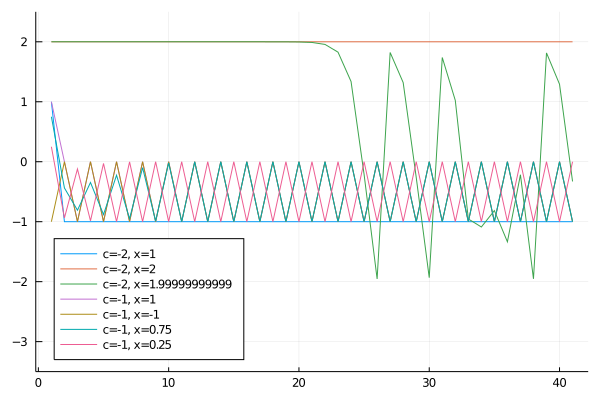

In [12]:
function shaw(series)
    x = [i for i in 1:length(series)]
    y = [series[i] for i in 1:length(series)]
    plot(x, y, legend=false)
end

function shaw_all()
    x = [i for i in 1:length(x1)]
    p = plot(x, [x1[i] for i in 1:length(x1)], label="c=-2, x=1", legend=:bottomleft, yaxis = ("",(-3.5,2.5)))
    plot!(p, x, [x2[i] for i in 1:length(x2)], label="c=-2, x=2")
    plot!(p, x, [x3[i] for i in 1:length(x3)], label="c=-2, x=1.99999999999")
    plot!(p, x, [x4[i] for i in 1:length(x4)], label="c=-1, x=1")
    plot!(p, x, [x5[i] for i in 1:length(x5)], label="c=-1, x=-1")
    plot!(p, x, [x6[i] for i in 1:length(x6)], label="c=-1, x=0.75")
    plot!(p, x, [x7[i] for i in 1:length(x7)], label="c=-1, x=0.25")
end
    
# shaw(x1)
shaw_all()

| $c$ | $x_0$            | ciąg                                       |
| :-: | :--------------: | :----------------------------------------: |
| -2  | 1                | ciąg stały -1                              |
| -2  | 2                | ciąg stały 2                               |
| -2  | 1.99999999999999 | ciąg zmienny o wartościach (-2, 2)         |
| -1  | 1                | ciąg naprzemieny 0 1                       |
| -1  | -1               | ciąg naprzemieny 0 -1                      |
| -1  | 0.75             | ciąg naprzemienny 0 -1 od 17-tego elementu |
| -1  | 0.25             | ciąg naprzemienny 0 -1 od 11-tego elementu |

Ciągami wartymi do przeanalizowania są drugi i trzeci. Dla obu $c=-2$, ale różnią się minimalnie wartością początkową ($\Delta x_0 = 10^{-11}$). Jak widac początkowo oba ciągi są stałę o wartości 2, natomiast po 20 iteracjach wartości ciągu trzeciego zaczynają się wachać w zakresie $(-2, 2)$.<br/>
Podobnie porównując ostatnie cztery ciągi, ostatecznie każdy przybiera regularny kształt $(1, -1, 1, -1, \dots)$, natomiast ciągi szósty i siódmy początkowo się wachają, zanim dotrą do podobnej formy.<br/>